In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('C:/Users/user/Downloads/05_data1.xlsx')
data

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


In [133]:
data.columns

Index(['no', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'systolic', 'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides',
       'HDL', 'LDL', 'hemoglobin', 'serum', 'smoking', 'drinking'],
      dtype='object')

In [134]:
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
data6.loc[data6['gender']==1,['gender']]='M'
data6.loc[data6['gender']==2,['gender']]='F'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking'
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

In [135]:
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()

drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')

drinking = drinking.reset_index()
smoking = smoking.reset_index()

In [136]:
maledata = data6.loc[data6.gender=='M', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
femaledata = data6.loc[data6.gender=='F', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

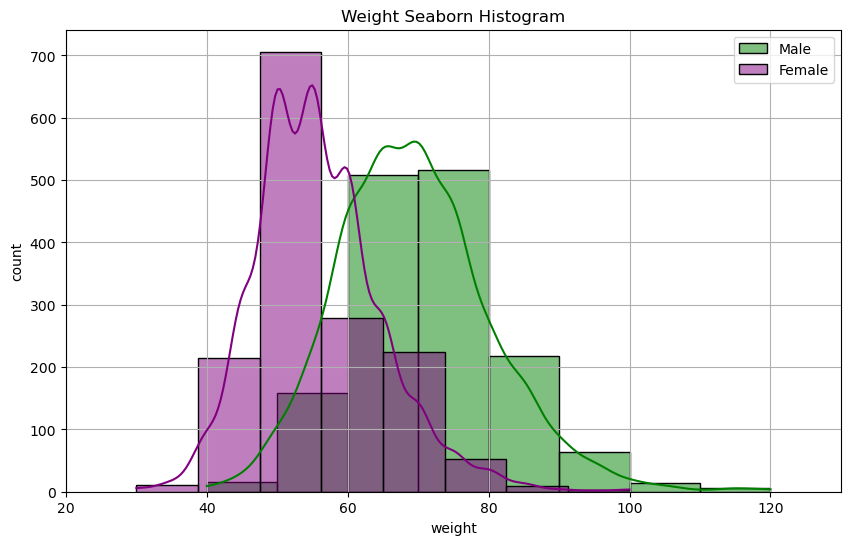

In [137]:
plt.figure(figsize=(10,6))
sns.histplot(maledata['weight'], bins=8, alpha=0.5, label='Male', color='g', kde=True)
sns.histplot(femaledata['weight'], bins=8, alpha=0.5, label='Female', color='purple', kde=True)

plt.xlim(20,130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()

In [138]:
# 전복 데이터

df = pd.read_csv("C:/Users/user/source/11장/chap11_전복나이예측.csv")
df

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,2.0
1,0.275,0.095,0.2170,0.0435,0.0900,1.0
2,0.470,0.165,0.9975,0.2420,0.3300,0.0
3,0.450,0.140,1.0130,0.2160,0.3600,0.0
4,0.380,0.135,0.6810,0.1420,0.1700,0.0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,0.0
998,0.260,0.100,0.1920,0.0585,0.0700,1.0
999,0.505,0.175,1.2075,0.2620,0.3900,0.0
1000,0.300,0.105,0.3040,0.0610,0.0805,1.0


In [139]:
df.columns

Index(['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group'],
      dtype='object')

In [140]:
#0. Group name 변경 Year0, Year1, Year2

df['Group'] = df['Group'].replace({0: 'Year0', 1: 'Year1', 2: 'Year2'})
df.head()

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.407,Year2
1,0.275,0.095,0.2170,0.0435,0.090,Year1
2,0.470,0.165,0.9975,0.2420,0.330,Year0
3,0.450,0.140,1.0130,0.2160,0.360,Year0
4,0.380,0.135,0.6810,0.1420,0.170,Year0


<Axes: title={'center': 'Abalone Group CountPlot Graph'}, xlabel='Group', ylabel='count'>

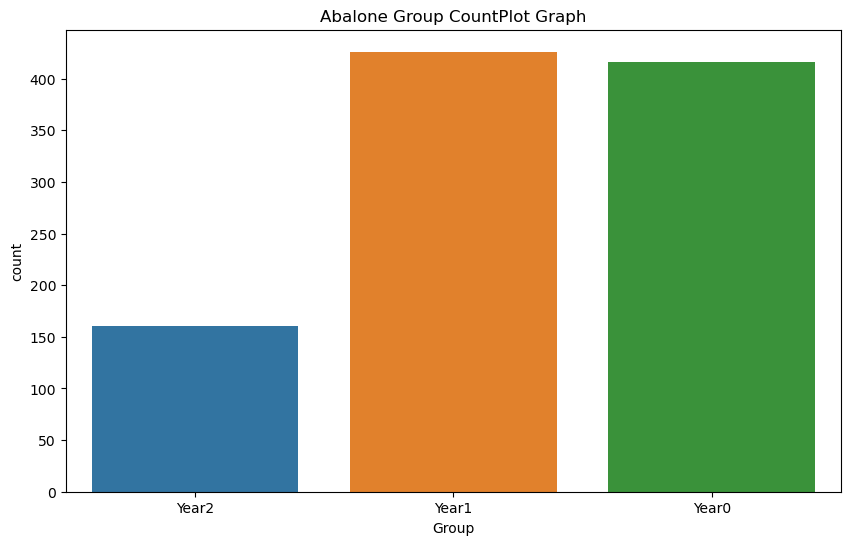

In [141]:
#1. Group Label Count

plt.figure(figsize=(10,6))
plt.title('Abalone Group CountPlot Graph')
sns.countplot(x='Group',data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


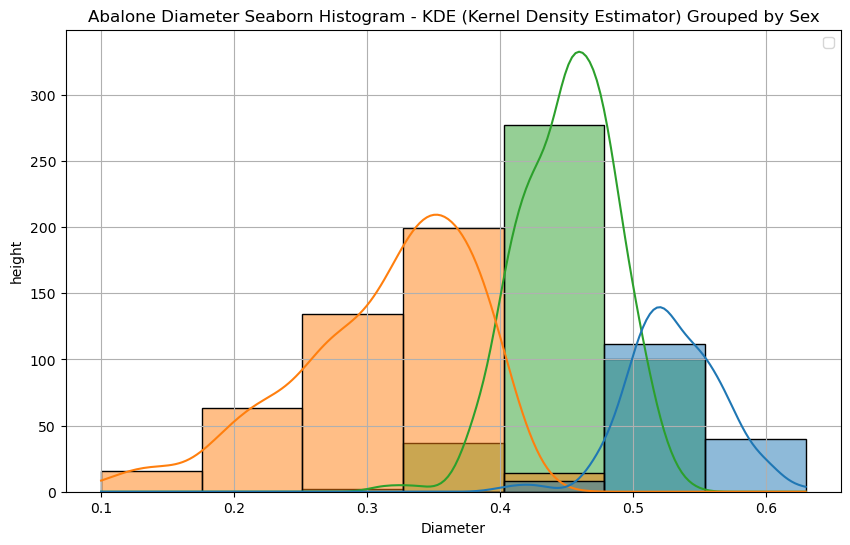

In [142]:
#2. Diameter / Height KDE histogram

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Diameter', bins=7, alpha=0.5, kde=True, hue='Group')

# plt.xlim(40,130)
plt.xlabel('Diameter')
plt.ylabel('height')
plt.title('Abalone Diameter Seaborn Histogram - KDE (Kernel Density Estimator) Grouped by Sex')
plt.legend()
plt.grid()
plt.show()

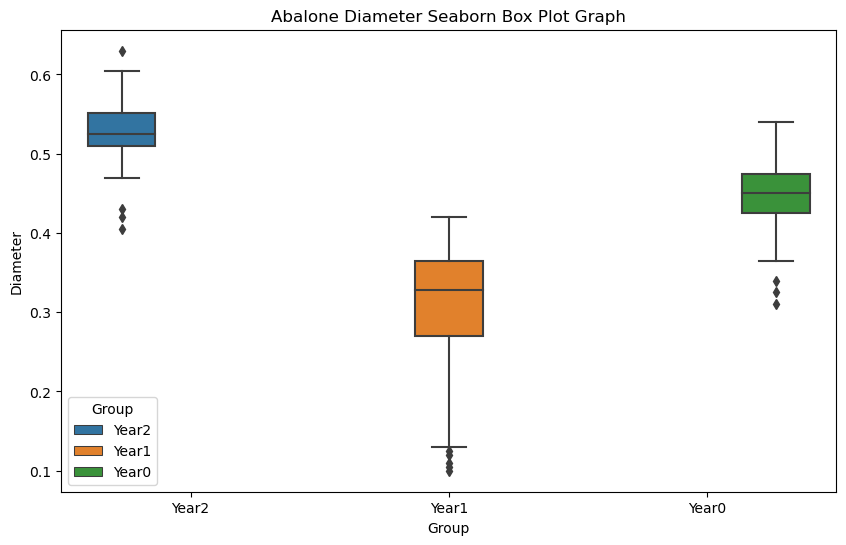

In [143]:
#3. seaborn boxplot Diameter

plt.figure(figsize=(10,6))
plt.title('Abalone Diameter Seaborn Box Plot Graph')

sns.boxplot(x='Group',y='Diameter',hue='Group',data=df)
plt.show()

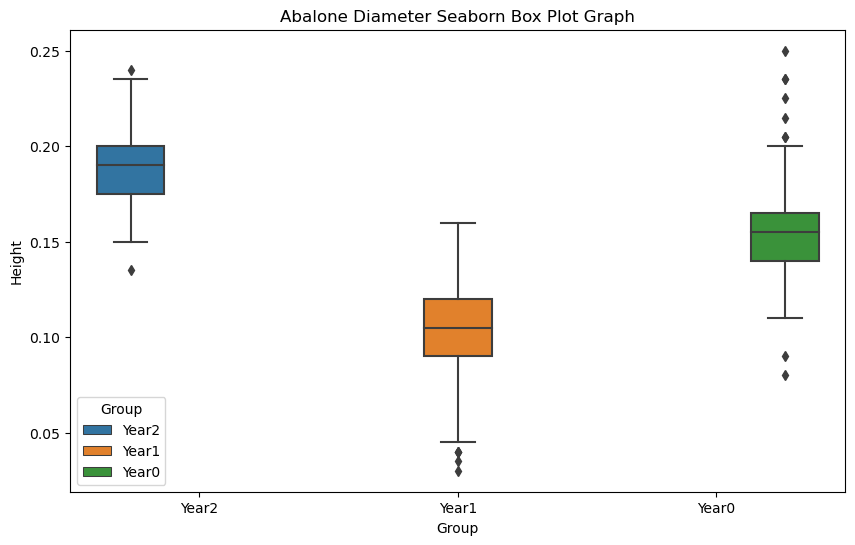

In [144]:
#3. seaborn boxplot Height

plt.figure(figsize=(10,6))
plt.title('Abalone Diameter Seaborn Box Plot Graph')

sns.boxplot(x='Group',y='Height',hue='Group',data=df)
plt.show()

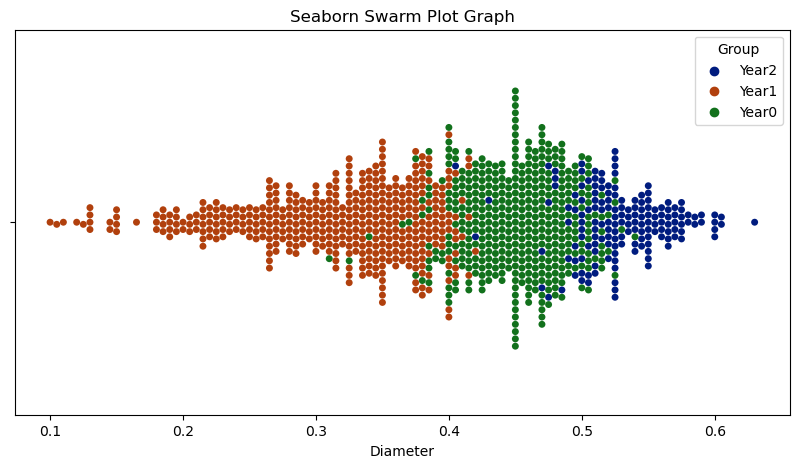

In [145]:
#3. seaborn swarmplot Diameter

plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(x='Diameter',data=df,hue='Group',palette='dark')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


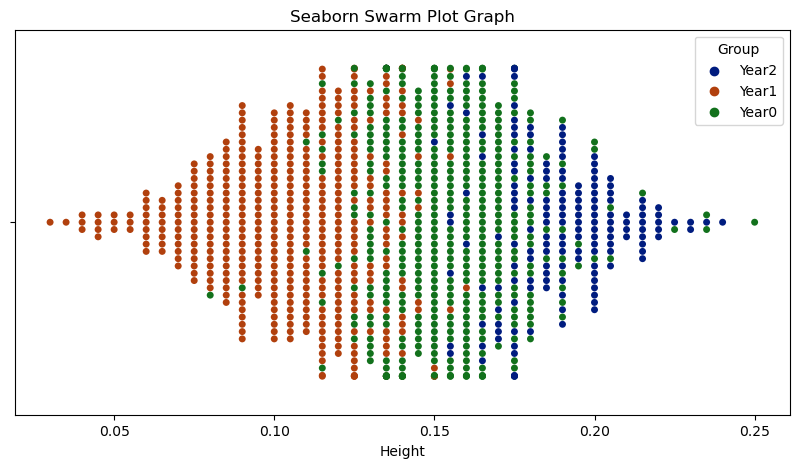

In [146]:
#3. seaborn swarmplot Height

plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(x='Height',data=df,hue='Group',palette='dark')
plt.show()

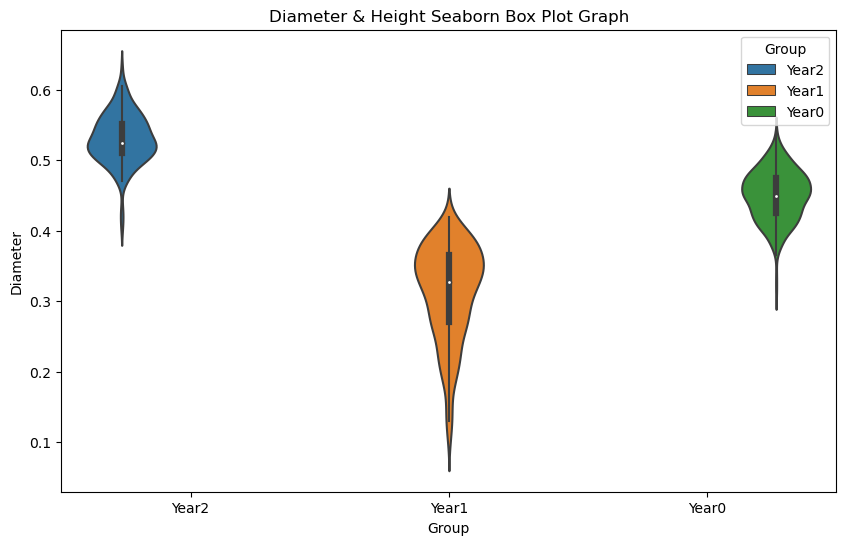

In [147]:
#4. Violinplot Diameter

plt.figure(figsize=(10,6))
plt.title('Diameter & Height Seaborn Box Plot Graph')

sns.violinplot(x='Group',y='Diameter', hue='Group',data=df)
plt.show()

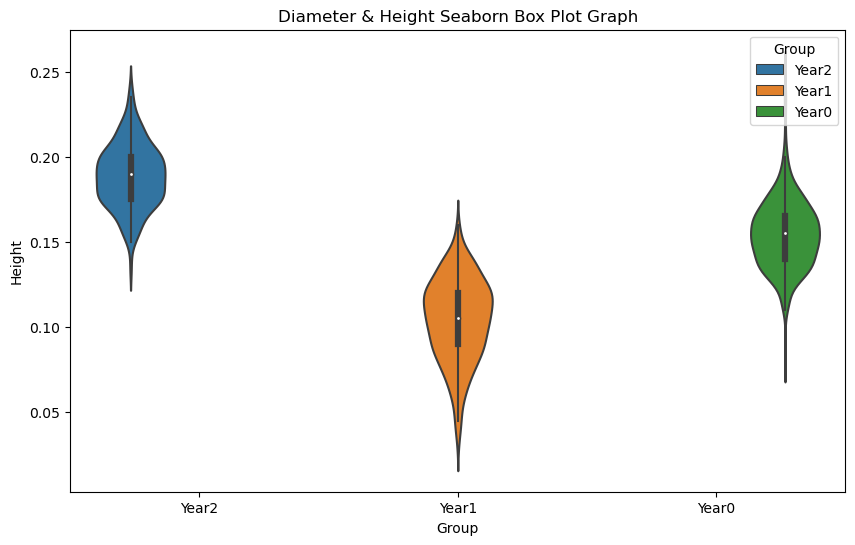

In [148]:
#4. Violinplot Height

plt.figure(figsize=(10,6))
plt.title('Diameter & Height Seaborn Box Plot Graph')

sns.violinplot(x='Group',y='Height', hue='Group',data=df)
plt.show()

In [149]:
df.columns

Index(['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group'],
      dtype='object')

<Axes: title={'center': 'Heat Map Graph'}>

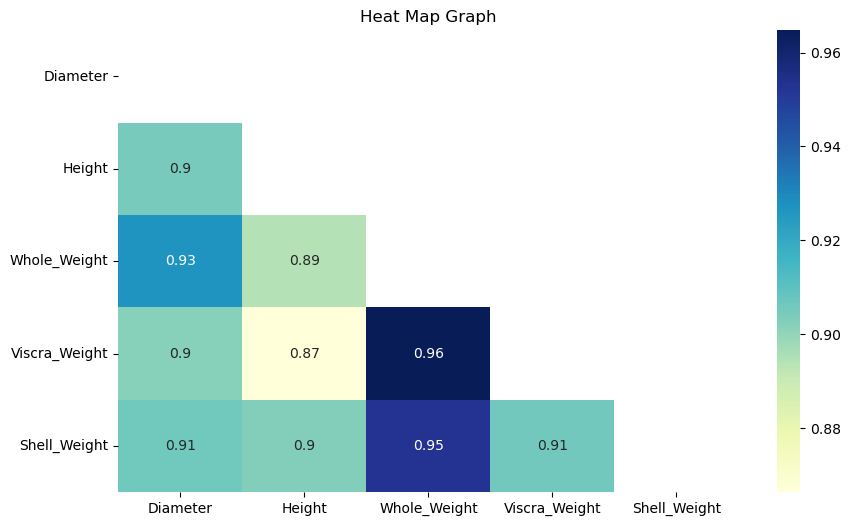

In [150]:
#5. Heatmap (upp_mat 적용)

abalone = df.loc[:,['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight']]

plt.figure(figsize=(10,6))
plt.title('Heat Map Graph')

correlation_data3 = abalone.corr()
upp_mat = np.triu(correlation_data3)
sns.heatmap(correlation_data3, annot=True, cmap='YlGnBu', mask=upp_mat)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


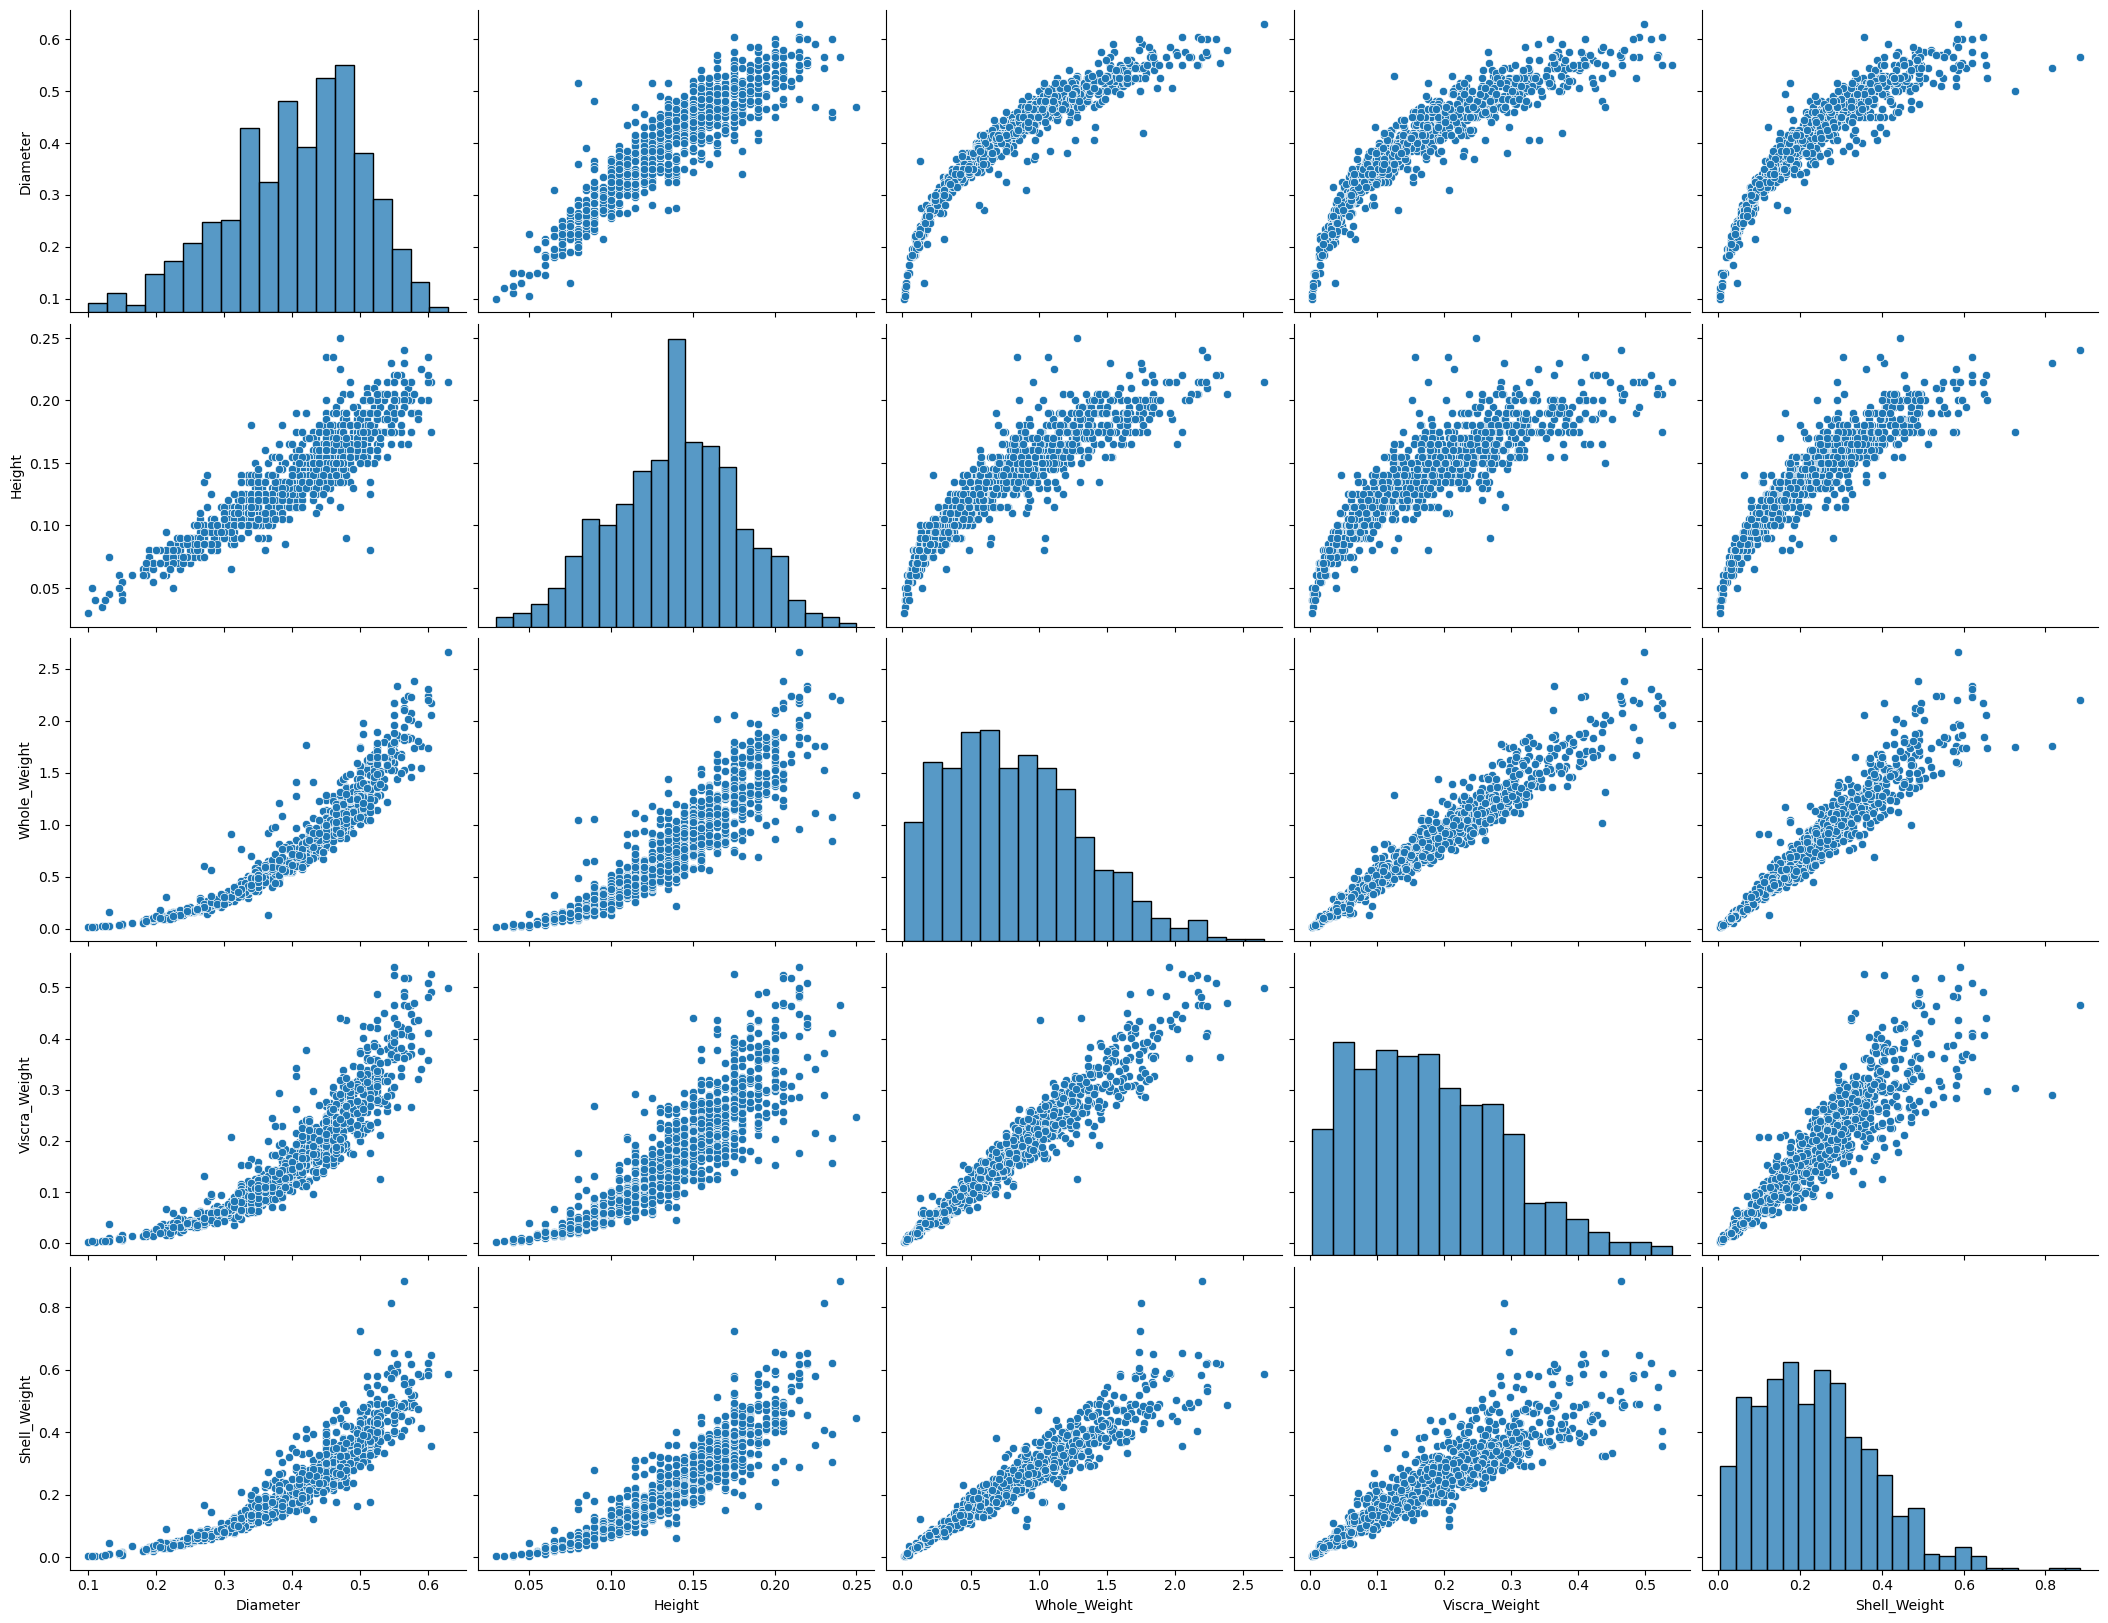

In [151]:
#6. pairplot

pp = sns.pairplot(df, height=3.3,aspect=1.3)

In [152]:
#7. Diameter, Height, Group만 추출해서 새로운 new_df만들고, Group 갯수별 Diameter > 0.15이면 BIG, 작으면 SMALL 구분해서 BIG, SMALL 개수 카운트

df3 = df.loc[:, ['Diameter', 'Height', 'Group']]

df3.loc[df['Diameter'] >= 0.4, ['Diameter']]='Big'
df3.loc[df['Diameter'] < 0.4, ['Diameter']]='Small'

Diameter = df3.groupby(['Group', 'Diameter'])['Diameter'].count()

Diameter = Diameter.to_frame(name='count')
Diameter = Diameter.reset_index()

In [153]:
Diameter

,Group,Diameter,count
0,Year0,Big,392
1,Year0,Small,24
2,Year1,Big,26
3,Year1,Small,400
4,Year2,Big,160


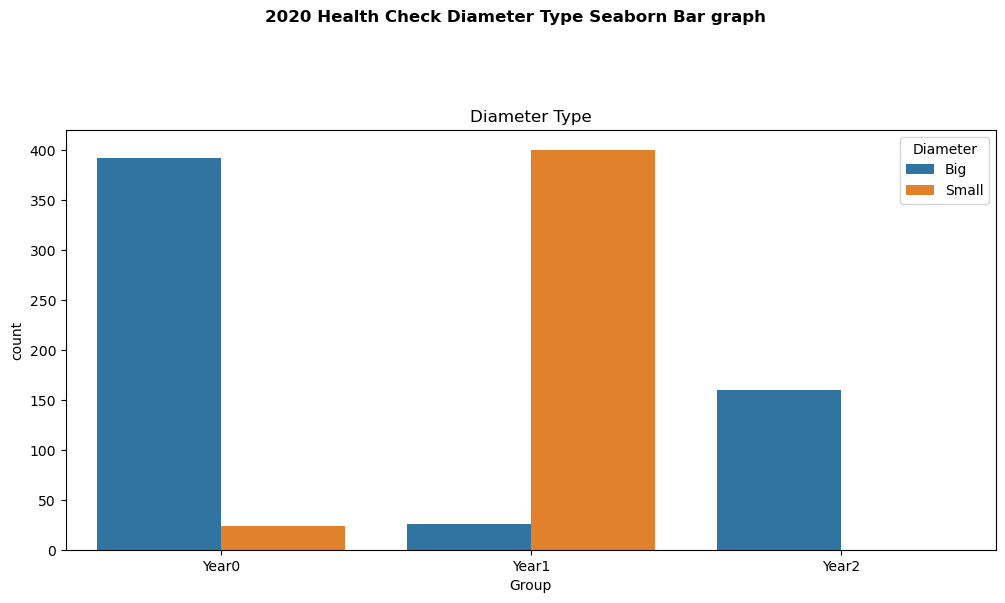

In [154]:
fig = plt.figure(figsize=(12,12))

area1 = fig.add_subplot(2,1,1)

ax1 = sns.barplot(x='Group', y='count', hue='Diameter', data=Diameter, ax=area1)

fig.suptitle('2020 Health Check Diameter Type Seaborn Bar graph', fontweight='bold')
area1.set_title('Diameter Type')

plt.show()